#Exploring Reconnection Using Simulation Results

Nicholas Gross (gross@bu.edu) (Boston University)

Marc Swisdak (Univ. of Maryland)

This notebook makes use of simulation data to explore aspects of reconnection and simulate spacecraft measurements at various points around the reconnection region.

Reconnection is an important process in space physics and is studied through a variety of approaches, including simulations (such as the results you will be exploring here), lab experiments, and space missions such as the NASA MMS mission (https://mms.gsfc.nasa.gov/science.html).

The simulation that generates there results are described in this [article](https://doi.org/10.1029/2001JA000287).  Many thanks to Marc Swisdak (swisdak@umd.edu) for preparing these simulation results.
###Simulation Details
- PIC simulation - Particle in Cell Simulation
- 2-D simulation with 3-D variables (sometimes called 2.5-D)
- periodic boundary conditions are periodic
- The initial conditions are steady state with a small perturbation that initiates the recoonection event.

- The length scales are measured ion skin depth.
Current sheets at 1/4 L  and 3/4 L, where L is 25.6
- Time scales are measured in the gyro period of the ions

In [ ]:
#import some standard packages
import numpy as np # package that includes some numerical functions and physical constants
import matplotlib as mpl
import matplotlib.pyplot as plt # package that provides standare ploting features
import scipy.io as sio # package includes functions that load IDL formatted data files

## 0) Loading Simulation Results
Prior to executing the next two cells, be sure to upload the required data files to your Google "My Drive" into the directory referenced in [this cell](#scrollTo=fgB0Yp9wRwdT&line=2&uniqifier=1).  The file names you are looking for are in [this cell](#scrollTo=EJ-7J1X-cs11&line=6&uniqifier=1). Only the first two files are needed to start with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# add path to the data file shortcut
%cd /content/drive/MyDrive/SHIELD/PIC_data/

[Errno 2] No such file or directory: '/content/drive/MyDrive/SHIELD/PIC_data/'
/content


In [ ]:
dat1 = sio.readsav("./shield_picsim_v4.dat")
dat2 = sio.readsav("./shield_picsim2_v4.dat")
#dat3 = sio.readsav("./shield_picsim3_v4.dat")
#dat1 = sio.readsav("./shield_picsim1_pu_v4.dat")
#dat2 = sio.readsav("./shield_picsim2_pu_v4.dat")


FileNotFoundError: [Errno 2] No such file or directory: './shield_picsim_v4.dat'

### Data Lists
The cell below extracts specific data lists from data files.  The following data parameters are available:
- Magnetic field components, bx, by, bz
- Current z component only (jz): (As you work, consider why only the z component is provided)
- ion and electron densities (deni and dene) *[Not used for the first activity]*
- ion and electron velocity componnts (vix, viy, viz and vex, vey, vez) *[Not used for the first activity]*

These are 3-D lists of shape [45,512,512]. The first index indicates the "time" variable, while the other two are spacial grid points in the simulation.

The other data lists are static and record position and time information.


In [ ]:
# magnetic field x, y, and z components
bx = dat1['bx']
by = dat1['by']
bz = dat1['bz']

# z component of current (Why only z component?)
jz = dat1['jz']

# Scaled distances and time
# distances are measure in ion skin depth
# times are measure in ion cyclotron period
xx = dat1['xx']
yy = dat1['yy']
tt = dat1['tt']

# grid spacing and time spacing
dx = dat1['dx'] #0.05*d_i (ion diffusion distance)
dy = dat1['dy']
dt = dat1['dt'] #0.5* cyclotron period

# x and y size of the simulaton: should be 25.6
lx = dat1['lx']
ly = dat1['ly']

# density ion and electron
#dene = dat2['dene']
#deni = dat2['deni']

# electron velocity
#vex = dat2['vex']
#vey = dat2['vey']
#vez = dat2['vez']

# ion velocity
#vix = dat2['vix']
#viy = dat2['viy']
#viz = dat2['viz']



## Explore the Simulation Results

###Visualize the Initial Conditions
In this part you will explore the structure of the data and the initial conditions.

### Plot different magnetic components of simulation results
Use cell below to plot the simulation results for the initial values of the magnetic field.

To plot the simulation results for a plasma variable for a particular time slice, choose the variable set the first index to the time slice you want. For example, "bx[0]" will give you the x component of the magnetic field for the initial time slice.  Explore all three components. You can update the second line of the cell to change the varilable being plotted.

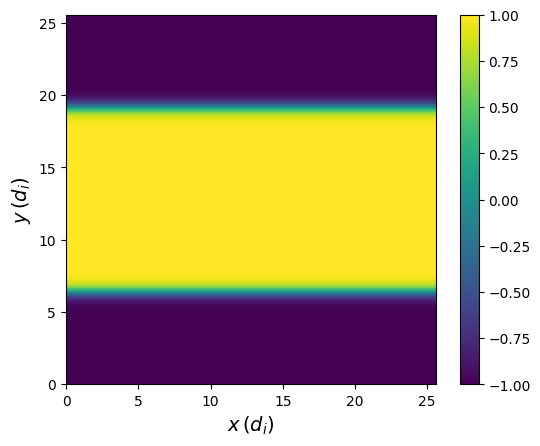

In [ ]:
#set the variable
var = bx[0]

#configure the plot
fig, ax = plt.subplots()

# set some plotting options
ax.set_aspect('equal')

ax.set_xlabel(r'$x\,(d_i)$', fontsize=14)
ax.set_ylabel(r'$y\,(d_i)$', fontsize=14)

#Plotting a variable with color map
t = ax.pcolormesh(xx,yy,var)
fig.colorbar(t)

# show plot
fig.show()

### Discussion
In your group discuss the following:
- *Which component dominates the magentic field? (Pay attention to the colormap scale)*
- *Which component provides the 'fluctuation' that initiates reconnection?*
- *On your shared workspace draw out the magnetic field configureation.*
- *Based on this magnetic field configuarion, indicate the locatoin of currents in the simulation.*
- *On your shared workspace draw the current configuration you expect.*

In the cell below, copy the code above and plot the configuration of the current (notice that only one component is provided).

In [ ]:
# Use this cell to explore the initial current configuraton of the simulation.


#### Discuss relationship of magnetic field to current.
- Is the current configuration consistant with the magnetic field?


### Adding Magnetic Field Lines
The next cell uses the same plotting routine as above but adds field lines to the plot.  

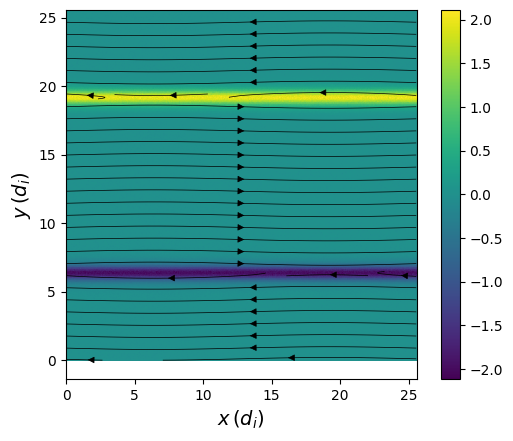

In [ ]:
#set the variable
var = jz[0]

#configure the plot
fig, ax = plt.subplots()

# set some plotting options
ax.set_aspect('equal')

ax.set_xlabel(r'$x\,(d_i)$', fontsize=14)
ax.set_ylabel(r'$y\,(d_i)$', fontsize=14)

#Plotting a variable with color map
t = ax.pcolormesh(xx,yy,var)
fig.colorbar(t)

#Plotting Field lines
xx_r = np.arange(0.0,25.6,0.05) #creating a regular grid for the field lines
yy_r = np.arange(0.0,25.6,0.05)  #creating a regular grid for the field lines
ax.streamplot(xx_r, yy_r, bx[0], by[0], linewidth=0.5, density = 1.0,color ='k')

# show plot
fig.show()

## 1) Exploring Reconnection
To initiate "reconnection", small perturbations are introduced in the "by" field (you should have seen this in the initial conditions above). In the next few sections you will explore the plasma variables as the reconnection is happening.

### Magnetic Field
Use the cell below to explore the different components of the magnetic field at different times. There are 45 time slices to choose from.

In [ ]:
# set the time
time = 0
var = bx[time]

#configure the plot
fig, ax = plt.subplots()

# set some plotting options
ax.set_aspect('equal')
ax.set_xlabel(r'$x\,(d_i)$', fontsize=14)
ax.set_ylabel(r'$y\,(d_i)$', fontsize=14)

#Plotting a variable with color map
t = ax.pcolormesh(xx,yy,var)
fig.colorbar(t)

#Plotting Field lines
ax.streamplot(xx_r, yy_r, bx[time], by[time], linewidth=0.5, density = 1.0,color ='k')

# show plot
fig.show()

### Magnetic Field Discussion
Choose a time that shows reconnection occuring.
- *Based componets of the magnetic field, draw the magnetic field line configuration near one of the reconnection events.*
- *Predict the current configuration around the reconnection point.*

Copy the code to the cell below and plot current configuration at the time you choose.

In [ ]:
# Copy code here to plot the current
# set the time

### Velocity

To look at velocity data, be sure to load the "shield_picsim2.dat" and then run the cells below.

In [ ]:
# density ion and electron
dene = dat2['dene']
deni = dat2['deni']

# electron velocity
vex = dat2['vex']
vey = dat2['vey']
vez = dat2['vez']

# ion velocity
vix = dat2['vix']
viy = dat2['viy']
viz = dat2['viz']


Again copy the plotting cell above and look at the velocity components for the ions such as "vix".
- Try looking at early times and then late times.

In [ ]:
# Copy code here and plot 'vix' variables
# Keep the stream lines plotting magnetic field lines.

#### Velocity Discussion
- *Based on what you see in the velocity components, sketch the flow (velocity) of the plasma on the same drawing as your magnetic field. Can you identify the 'exhaust' region?*
- *What is the ratio of the inflow speed to the outflow speed during pick reconnection?*
- *Take a picture of your sketch and post it on the Jam Board.*
- *Discuss the evolution of a reconnection event and be able to explain it.*

## 2) "In-situ" (single point) measurements of a reconnection event
In the above visualizations, it is possible to see the global structure of the system, even if you have to view it one variable at a time.

By contrast, spacecraft can only take measurements at a single point. The global picture has to be reconstructed by comparing point measurements from a global model to those from the data.

In this section, you will probe the simulation and plot time series for the different variables at a single point.

### Spacecraft "Fly Thru"
If instead of the reconnection happening so fast that it washes over the space craft, assume that the spacecraft flies through the reconnection region fast enough that it can be considered a snapshot in time. To explore this, we can choose a few paths through the simulation space either with a fixed 'y' and varying 'x' or visa versa.  The next cell generates those plots for a choosen time and fixed x or y.  
- The first cell shows the "fly through" line.
- The second cell generates the plot of the varilable.

In [ ]:
# Start with fixed time and varying y_pos
time = 0
y_pos = 10 # Set the 'y' position to scan along
var = by[time]

fig, ax = plt.subplots(figsize=(5,5))
t = ax.pcolormesh(xx,yy,var)
ax.set_aspect('equal')
fig.colorbar(t)
ax.set_xlabel(r'$x\,(d_i)$', fontsize=14)
ax.set_ylabel(r'$y\,(d_i)$', fontsize=14)
ax.axhline(y = y_pos, color = 'r', linestyle = '--') #Draw a horizontal line
#ax.axvline(x = y_pos, color = 'r', linestyle = '--') #Draw a vertical line

# Plotting stream plot
ax.streamplot(xx_r, yy_r, bx[time], by[time], linewidth=0.1, density = 1.0,color ='k')
# show plot
fig.show()

In [ ]:
#This cell uses the position and variable set in the previous cell.
y_temp = []  #temporary y variable that will be plotted
i = int(y_pos/dy) # calculate position index
for j in range (len(xx)):
  y_temp.append(var[i,j]) # extract data from a horizontal line
#  y_temp.append(vix[time,j,i]) #extract data from a vertical line
  #print(bx[t,i,j])

plt.scatter(xx,y_temp,1)
plt.grid(visible="True")
plt.xticks(ticks = np.arange(0,25.6,1))
plt.xlabel("x");plt.ylabel("vaiable") # axis labels

### Discussion of Fly Through
Explore the different plasma parameters at different position in the simulation.  
- How do the plasma parameters vary near and away from the reconneciton region?
- Is what you observe consistent with your understanding of reconnection?

Choose a few different lines the cut through the reconnection region. Try looking at different components of the velocity.

- Can you see evidence of inflow and outflow? How do the relative flows compare to each other?

Return to the $B_y$ variable and look at a horizontal cutline through the reconnection region and create the plot.  
- Identify the location of the reconnection region.
- Estimate the upper limit of the width of the ion diffusion region.
- How do you think the amount of postive flux in the postive and negative'y' direction compare to each other?

##Reconnection Rate
The "reconnection rate" is a measure of how much magnetic flux is "reconnected". For this particularly simulation, the initial magnetic field configuration has the magnetic field in the primarily x-direction, magnetic reconnection generates magnetic field in the y-direction in the reconnection region.  

To measure the reconnection rate we can measure the amount of $B_y$ flux generated along the whole line.
$$ Φ_y = \int B_y dx \rightarrow \sum B_y*dx$$

This is equivalent to integrating along the line through the reconnection region that you traced above. The sum is used in the case of a discrete system such as a simulation on a grid. Note that if the integral is over the whole line through the simulation then it should should be zero since the divergence of the magnetic field should be zero (the "no monopoles" rule). To account for this we can sum the absolute value and divide by 2.
$$ Φ_y = \frac{1}{2} \sum |B_y| *dx$$

The reconnection rate is the time derivative (slope of the graph) of this measure.

The cell below does both the original sum and the absolute sum indicated above.

In [ ]:
var_sum = []
var_asum = []
# y_pos = 19 #y_pos previously set in a previous cell
for t in range(0,46):
  var = by[t]
  y_temp = [] #temporary y variable that will be plotted
  i = int(y_pos/dy) # calculate position index
  for j in range (len(xx)):#Sum the B_y magnetic flux along the line
    y_temp.append(var[i,j]*dx/2)
  var_sum.append(np.sum(y_temp))  #this value should end up being close to zero
  var_asum.append(np.sum(np.abs(y_temp)))

#  plt.scatter(tt[t],var_sum[t],1,)
plt.scatter(tt,var_asum,1)
plt.xlabel("time");plt.ylabel("flux") # axis labels

### Discussion
- Identify the time of the maximum reconnection rate.
- How does the reconnection rate change with time over the course of the simulation?
- Why do you think the reconnection rate decrease? How could the simulation be adjusted to change this?



### Sharing First Results
Label one of your graphs (either using code or by hand) and then share it on the Jam board set up for this lab.


## Adding Pickup Ions
In the next section, you can explore what happens to reconnection when the Pickup-Ions are added.  

Pickup Ions are added as a seperate population of particles with their own density and velocity distribution. They start to interact with the plasma and this section explores how they affect magnetic reconnection.

### Reading New Data


In [ ]:
pui1 = sio.readsav("./shield_picsim1_pu_v4.dat")
pui2 = sio.readsav("./shield_picsim2_pu_v4.dat")

In [ ]:
# magnetic field x, y, and z components
p_bx = pui1['bx']
p_by = pui1['by']
p_bz = pui1['bz']

# z component of current (Why only z component?)
p_jz = pui1['jz']

# Scaled distances and time
# distances are measure in ion skin depth
# times are measure in ion cyclotron period
xx = pui1['xx']
yy = pui1['yy']
tt = pui1['tt']

# grid spacing and time spacing
dx = pui1['dx'] #0.05*d_i (ion diffusion distance)
dy = pui1['dy']
dt = pui1['dt'] #0.5* cyclotron period

# x and y size of the simulaton: should be 25.6
lx = pui1['lx']
ly = pui1['ly']

# density ion and electron
p_dene = pui2['dene']
p_deni = pui2['deni']

# electron velocity
p_vex = pui2['vex']
p_vey = pui2['vey']
p_vez = pui2['vez']

# ion velocity
p_vix = pui2['vix']
p_viy = pui2['viy']
p_viz = pui2['viz']


The above cell uses the same variable names with a 'p_' as a prefix to distinguish the it from the original runs.

### Comparing the results: Magnetic Field
Use the code from above to visualize the results.  Start again with the magnetic field components.  

In [ ]:
#Copy code here to plot the B-field components with field lines.
# remember to replace bx, by, and bz with p_bx, p_by, and p_bz

In [ ]:
#Copy code here to plot the velocity components

### Discussion of Effect of PUI's
-  In the plots above, be sure to choose different times, particularly in the middle of the simulation.
- How does the presence of PUI's

## Effect of PUI's on Reconnection Rate
Use the cells below to calcuate the reconnection rate.

In [ ]:
#Copy code here to plot reconnection rate.
# remember to replay bx, by, and bz with p_bx, p_by, and p_bz